In [2]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 53.2 MB/s eta 0:00:00


In [3]:
import numpy as np
from astropy.io import ascii
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt

In [4]:
Gaia.ROW_LIMIT = 50
coord = SkyCoord(ra='22h07m30.00s', dec='+00d43m00.4s', frame='icrs')
q_resutl = Gaia.cone_search_async(coord, radius=u.Quantity(0.5, u.deg),
                                  columns=["ra", "dec", "pmra", "pmdec", "phot_g_mean_mag"]).get_results()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
ascii.write(q_resutl, "GAIA_table.txt", overwrite=True, delimiter="\t",
            format="commented_header", fill_values=[(ascii.masked, "nan")])

In [ ]:
q_resutl = ascii.read("GAIA_table.txt", delimiter="\t", format="commented_header",
                      fill_values=[(ascii.masked, "nan")])

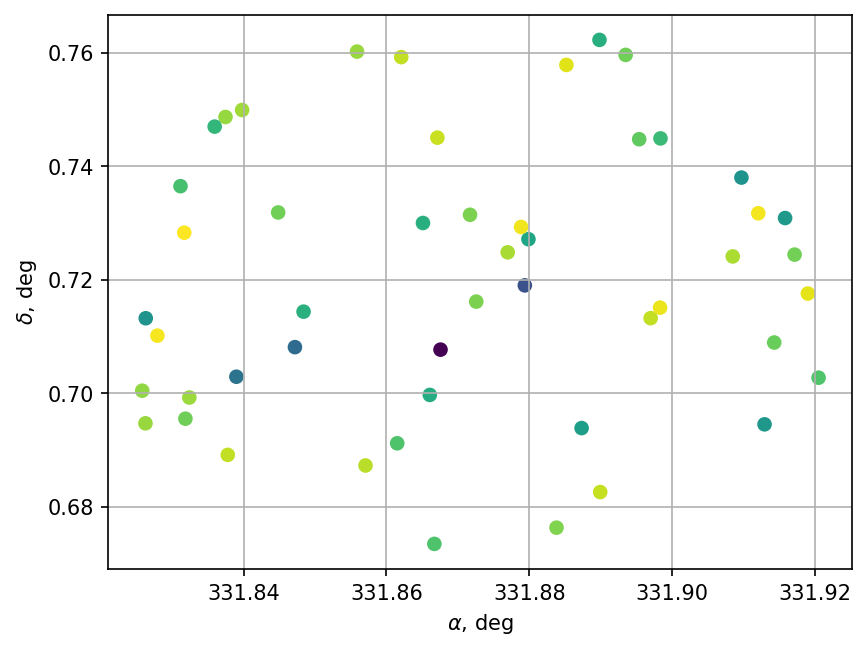

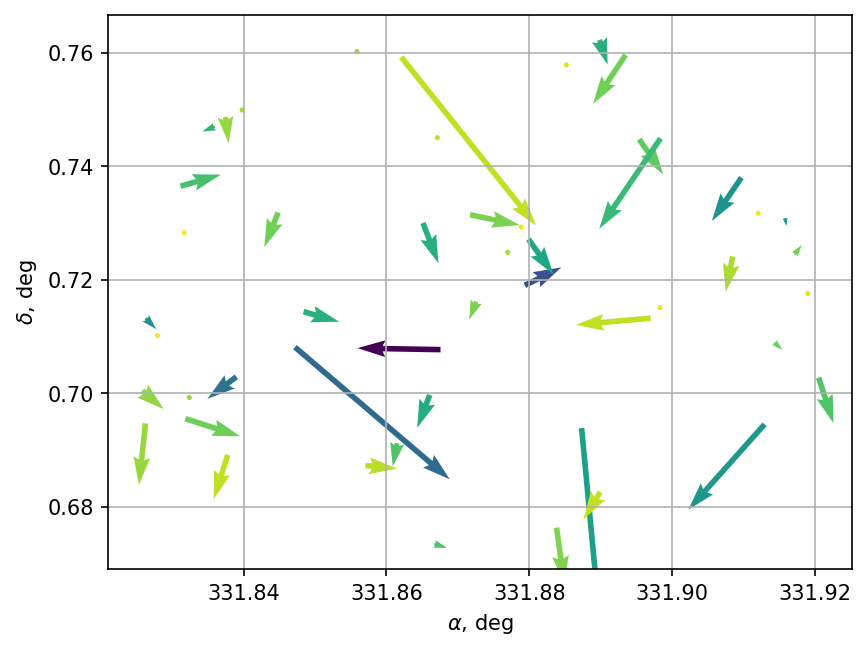

In [6]:
fig1, ax1 = plt.subplots(dpi=150)
ax1.set_xlabel(r"$\alpha$, deg")
ax1.set_ylabel(r"$\delta$, deg")
ax1.grid()
msize = q_resutl["phot_g_mean_mag"]
ax1.scatter(q_resutl["ra"], q_resutl["dec"], c=q_resutl["phot_g_mean_mag"])
plt.savefig(f"result_scatter.png")


fig2, ax2 = plt.subplots(dpi=150)
ax2.set_xlabel(r"$\alpha$, deg")
ax2.set_ylabel(r"$\delta$, deg")
ax2.grid()
ax2.quiver(q_resutl["ra"].filled(0), q_resutl["dec"].filled(0), q_resutl["pmra"].filled(0), q_resutl["pmdec"].filled(0), q_resutl["phot_g_mean_mag"])
plt.savefig(f"result_quiver.png")